In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#from sklearn.datasets import load_iris les iris de seaborn sont mieux

In [2]:
#iris=load_iris()
iris2 = sns.load_dataset("iris")

In [5]:
list(iris2)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [6]:
iris2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris2.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [8]:
iris2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris2.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris2.shape

(150, 5)

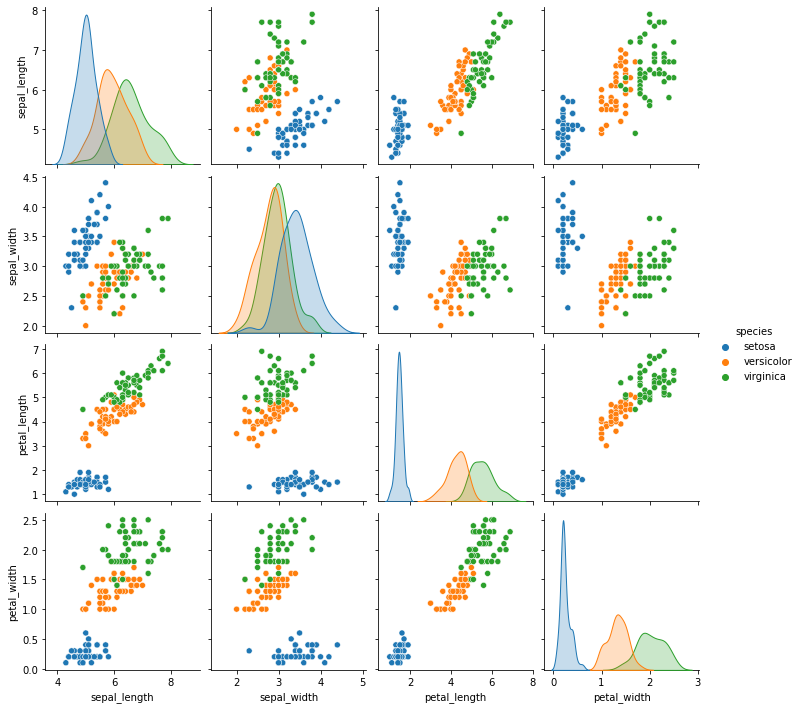

In [12]:
sns.pairplot(iris2, hue="species")

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X=iris2.iloc[:,0:4] #c'est à dire qu'on ne prend que les 4 premières colonnes qui correspondent aux features
y=iris2.iloc[:,-1] #c'est à dire la dernière colonne

In [16]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [17]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [18]:
Xtrain

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
118,7.7,2.6,6.9,2.3
1,4.9,3.0,1.4,0.2
31,5.4,3.4,1.5,0.4
50,7.0,3.2,4.7,1.4
...,...,...,...,...
0,5.1,3.5,1.4,0.2
92,5.8,2.6,4.0,1.2
43,5.0,3.5,1.6,0.6
101,5.8,2.7,5.1,1.9


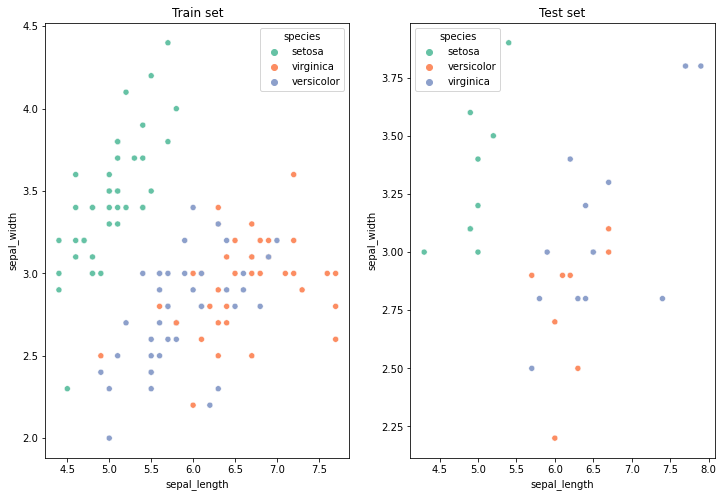

In [20]:
cmap = sns.cubehelix_palette(dark=.1, light=.8, as_cmap=True)
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.scatterplot(x=Xtrain.sepal_length, y=Xtrain.sepal_width, hue=ytrain,palette="Set2")
plt.title('Train set')
plt.subplot(122)
sns.scatterplot(x=Xtest.sepal_length, y=Xtest.sepal_width,hue=ytest,palette="Set2")
plt.title('Test set')
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier  #on importe un model ici KNN

In [22]:
model=KNeighborsClassifier(n_neighbors=1)

In [23]:
model.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [24]:
model.score(Xtrain,ytrain)

1.0

In [25]:
model.score(Xtest,ytest)

0.9333333333333333

In [26]:
from sklearn.model_selection import cross_val_score #on instaure la séquence de cross validation par Stratified Kfold
#c'est à dire qu'on va diviser le train set en un train set et un validation set pour ne vraiment pas toucher au test set

In [27]:
cross_val_score(KNeighborsClassifier(5),Xtrain,ytrain,cv=5,scoring='accuracy')

array([1.        , 0.91666667, 0.91666667, 1.        , 1.        ])

In [28]:
cross_val_score(KNeighborsClassifier(3),Xtrain,ytrain,cv=5,scoring='accuracy').mean()

0.975

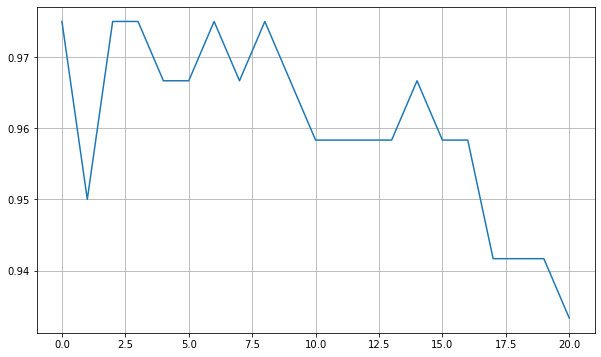

In [34]:
val_score=[]
for k in range(1,22):
    score=cross_val_score(KNeighborsClassifier(k),Xtrain,ytrain,cv=5,scoring='accuracy').mean()
    val_score.append(score)

plt.figure(figsize=(10,6))    
plt.plot(val_score)
plt.grid(True)
plt.show()


In [35]:
#mais cette boucle est inutile car on a la validation curve qui va faire ce travail pour nous !
from sklearn.model_selection import validation_curve

In [49]:
model=KNeighborsClassifier()
k=np.arange(1,50)

train_score,val_score=validation_curve(model,Xtrain,ytrain,param_name='n_neighbors',param_range=k,cv=5,scoring='precision_macro')

In [47]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

Pour un bon article sur les métriques, cf : https://aigents.co/blog/publication/distance-metrics-for-machine-learning

In [50]:
val_score.shape

(49, 5)

In [51]:
val_score.mean(axis=1)

array([0.97666667, 0.95592593, 0.97592593, 0.97925926, 0.97      ,
       0.97185185, 0.97777778, 0.97185185, 0.97925926, 0.97441077,
       0.96515152, 0.96700337, 0.96700337, 0.96700337, 0.97441077,
       0.96700337, 0.96700337, 0.95703704, 0.95703704, 0.95703704,
       0.9487037 , 0.94203704, 0.94796296, 0.94203704, 0.94203704,
       0.94203704, 0.94203704, 0.94203704, 0.94203704, 0.94203704,
       0.9315873 , 0.9315873 , 0.9315873 , 0.93002035, 0.9281685 ,
       0.91957061, 0.9281685 , 0.9281685 , 0.9281685 , 0.91957061,
       0.9281685 , 0.91957061, 0.91957061, 0.93002035, 0.91957061,
       0.93002035, 0.93002035, 0.93002035, 0.93002035])

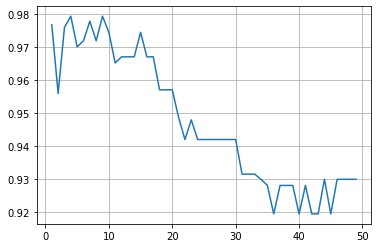

In [53]:
plt.plot(k,val_score.mean(axis=1))
plt.grid(True)

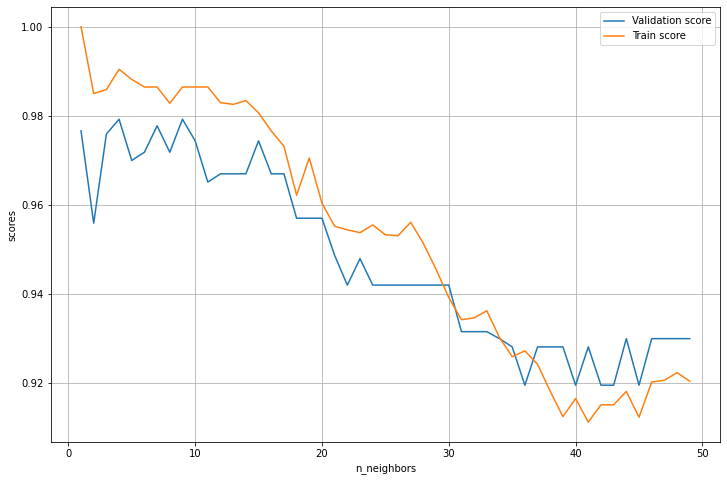

In [55]:
plt.figure(figsize=(12,8))
plt.plot(k,val_score.mean(axis=1),label='Validation score')
plt.plot(k,train_score.mean(axis=1),label='Train score')
plt.ylabel('scores')
plt.xlabel('n_neighbors')
plt.grid(True)
plt.legend()
plt.show()

# Méthode de recherche des meilleurs hyperparamètres par grille de recherche

Dans ce qui précède, on n'a testé qu'un seul hyperparamètre, or, il en existe d'autres comme par exemple la façon de mesurer, c'est ce que l'on appelle la métrique. Donc à priori une infinité de valeurs pour chacun, qu'on teste sur des valeurs finies, par grille de recherche  

![grille de recherche](images/gridsearch.png)

In [109]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  #méthode de GridSearch

In [110]:
param_grid={'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan']}  #un dictionnaire avec les hyperparam

In [111]:
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

In [112]:
grid.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [113]:
grid.best_score_

0.9833333333333334

In [114]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 7}

In [115]:
model=grid.best_estimator_

In [116]:
model.score(Xtest,ytest)

0.9

Pour randomizedsearcCV, contrairement à GridSearchCV, toutes les valeurs des paramètres de la grille ne sont pas testées, mais un nombre fixe de paramètres est échantillonné à partir des distributions spécifiées. Le nombre de réglages de paramètres qui sont essayés est donné par n_iter.

In [123]:
model_bis=RandomizedSearchCV(KNeighborsClassifier(),param_grid)

In [124]:
model_bis.fit(Xtrain, ytrain)

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [125]:
model_bis.best_params_

{'n_neighbors': 3, 'metric': 'euclidean'}

In [127]:
model_bis.score(Xtest,ytest)

0.9333333333333333

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(ytest,model.predict(Xtest))

array([[ 9,  0,  0],
       [ 0,  5,  3],
       [ 0,  0, 13]], dtype=int64)

In [67]:
#et si on donne plus de données, c'est mieux ? => learning_curve

In [68]:
from sklearn.model_selection import learning_curve

In [69]:
N,train_score,val_score=learning_curve(model,Xtrain,ytrain,train_sizes=np.linspace(0.1,1.0,10),cv=5)

In [70]:
N

array([ 9, 19, 28, 38, 48, 57, 67, 76, 86, 96])

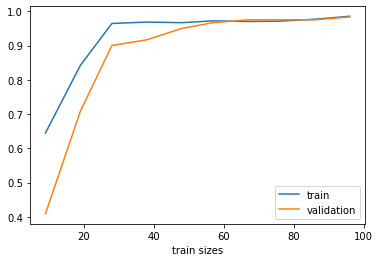

In [71]:
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('train sizes')
plt.legend()


Par SVM

Ce classificateur, qui est formellement défini par un hyperplan de séparation, a de nombreux paramètres de réglage à prendre en compte, mais nous ne nous concentrerons que sur trois d'entre eux : C, le Noyau et Gamma.
* C est le paramètre de régularisation. Comme le note la documentation, la force de la régularisation est inversement proportionnelle au C. En gros, ce paramètre indique au modèle à quel point vous voulez éviter de vous tromper. Vous pouvez considérer l'inverse de C comme votre budget total d'erreurs (additionné à tous les points de formation), une valeur C plus faible permettant plus d'erreurs qu'une valeur plus élevée de C ; une valeur C plus faible permet plus d'erreurs, ce qui se traduit par un biais plus élevé.
* Gamma détermine la portée de l'influence d'un seul point d'entraînement. Une faible valeur gamma permet de prendre en compte dans son calcul des points éloignés de l'hyperplan, tandis qu'une valeur gamma élevée privilégie la proximité. gamma est inversement proportionnel à K dans KNN, plus le gamma est élevé, plus l'ajustement est serré (faible biais).
* Noyau spécifie quel noyau doit être utilisé. Certaines des chaînes de caractères acceptables sont "linear", "poly" et "rbf". Linear utilise l'algèbre linéaire pour résoudre l'hyperplan, tandis que 'poly' utilise un polynôme pour résoudre l'hyperplan dans une dimension supérieure (voir l'astuce du noyau). 'RBF', ou 'noyau de la fonction de base radiale', utilise la distance entre l'entrée et un point fixe (soit l'origine ou une partie du point fixe c) pour faire une hypothèse de classification. 

In [102]:
from sklearn.svm import SVC

In [104]:
param_grid={
    'kernel':['linear','poly','rbf'],
    'C':[0.001,0.01,0.1,1,10,100],
    'gamma':[0.001,0.01,0.1,1]
}

In [105]:
grille_svc=GridSearchCV(SVC(),param_grid=param_grid)
grille_svc.fit(Xtrain,ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']})

In [106]:
grille_svc.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

In [107]:
model=grille_svc.best_estimator_

In [108]:
model.score(Xtest,ytest)

0.9

Par ADABOOST
Le principe de base d'AdaBoost (méthode d'ensemble) est de faire correspondre une séquence d'apprenants faibles (c'est-à-dire des modèles qui ne sont que légèrement meilleurs que les devinettes aléatoires, comme les petits arbres de décision) à des versions modifiées à plusieurs reprises sur les données. Les prédictions de tous ces modèles sont ensuite combinées par un vote à la majorité pondérée (ou somme) pour produire la prédiction finale. Les modifications des données à chaque itération dite de "boosting" consistent à appliquer des pondérations w1,w2,...wN,à chacun des échantillons de formation. Au départ, ces poids sont tous réglés sur wi=1/N de sorte que la première étape consiste simplement à former un apprenant faible sur les données d'origine. Pour chaque itération successive, les poids d'échantillon sont modifiés individuellement et l'algorithme d'apprentissage est réappliqué aux données repondérées. À une étape donnée, les exemples d'entraînement qui ont été incorrectement prédits par le modèle renforcé induit à l'étape précédente voient leur poids augmenté, alors que les poids sont diminués pour ceux qui ont été prédits correctement. Au fur et à mesure des itérations, les exemples difficiles à prédire reçoivent une influence toujours plus grande. Chaque apprenant faible suivant est ainsi forcé de se concentrer sur les exemples qui sont manqués par les précédents dans la séquence.



In [90]:
#par Adaboost
from sklearn.ensemble import AdaBoostClassifier

In [93]:
ada=AdaBoostClassifier()
param_grid={
    'n_estimators':[100,200],
    'learning_rate':[0.001,0.01,0.1,0.2,0.5,1,10]}

In [95]:
grille_ada=GridSearchCV(ada,param_grid=param_grid)

In [97]:
grille_ada.fit(Xtrain,ytrain)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5, 1, 10],
                         'n_estimators': [100, 200]})

In [98]:
grille_ada.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [99]:
grille_ada.best_score_

0.9833333333333334

In [100]:
model=grid.best_estimator_

In [101]:
model.score(Xtest,ytest)

0.9

In [72]:
#les différentes techniques de cross-validation
#la première est KFold 
from sklearn.model_selection import KFold

In [73]:
cv = KFold(5)  #on indique le nombre de split
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv)

array([1.        , 0.91666667, 1.        , 1.        , 1.        ])

In [74]:
from sklearn.model_selection import LeaveOneOut  #autre méthode par LeaveOneOut 

In [75]:
cv=LeaveOneOut()
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [76]:
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv).mean()

0.9833333333333333

In [77]:
from sklearn.model_selection import ShuffleSplit  #autre méthode ShuffleSplit

In [78]:
cv=ShuffleSplit(4, test_size=0.2)  #avec le nombre de split et la proportion du set de vlaidation qui sera présent dans chaque split
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv)

array([0.95833333, 1.        , 0.95833333, 1.        ])

In [79]:
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv).mean()

0.9687500000000001

In [80]:
from sklearn.model_selection import StratifiedKFold  #autre méthode StratifiedKFold, la meilleure méthode par défaut

In [81]:
cv=StratifiedKFold(5)

In [82]:
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv)

array([1.        , 0.91666667, 0.91666667, 1.        , 1.        ])

In [83]:
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv).mean()

0.9666666666666666

In [84]:
from sklearn.model_selection import GroupKFold  #si on a des dataset avec des données qui dépendent les unes des autres

In [85]:
cv=GroupKFold(5).get_n_splits(Xtrain,ytrain,groups=X.iloc[:,0])

In [86]:
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv)

array([1.        , 0.91666667, 0.91666667, 1.        , 1.        ])

In [87]:
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv).mean()

0.9666666666666666

In [88]:
from sklearn.model_selection import GroupShuffleSplit
cv=GroupShuffleSplit(5).get_n_splits(Xtrain,ytrain,groups=X.iloc[:,1])

In [89]:
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv)

array([1.        , 0.91666667, 0.91666667, 1.        , 1.        ])

In [89]:
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv).mean()

0.9836666666666666